# Loading Images and Data Preprocessing:

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
import os
import cv2

In [3]:
# importing my functions

from helpers_preproc import (process_image, 
                                get_data)

## Visualizing Images

It is essential for understanding the data and ensuring that it's loaded correctly. It also helps to verify that images are in grayscale format.

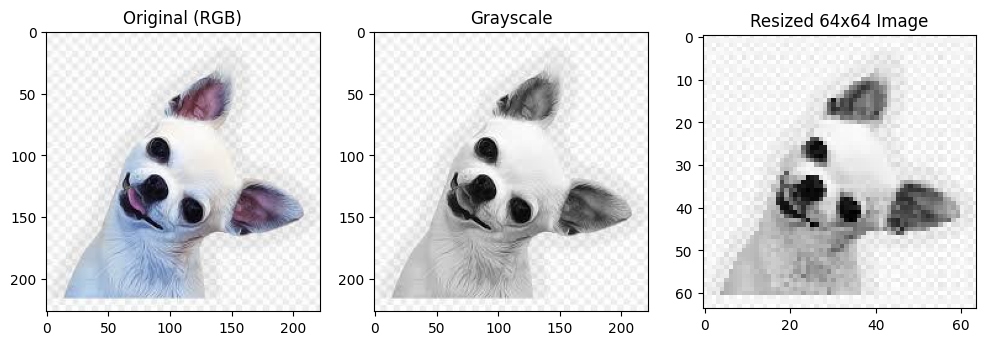

In [4]:
import cv2
import matplotlib.pyplot as plt


image_path = 'Muffin vs Chihuahua/train/chihuahua/img_0_38.jpg'

# RGB full-sized image
rgb_image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# grayscale full-sized image
gray_image_full = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# grayscale image to 64x64
gray_image_64x64 = cv2.resize(gray_image_full, (64, 64))


fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# RGB full-sized image
axs[0].imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original (RGB)')
axs[0].axis('on')

# grayscale full-sized image
axs[1].imshow(gray_image_full, cmap='gray')
axs[1].set_title('Grayscale')
axs[1].axis('on')

# grayscale 64x64 image
axs[2].imshow(gray_image_64x64, cmap='gray')
axs[2].set_title('Resized 64x64 Image')
axs[2].axis('on')

plt.savefig('plots/process_plot.png')

plt.show()


`imread()` and `IMREAD_GRAYSCALE` loads the image in `grayscale`, which means it will be represented as a `2D` array of pixel values where each value corresponds to the intensity of a pixel.

The image matrix is a `2D NumPy array` where each value represents the intensity of a pixel. The `shape`, in this case, is `(259, 194)`, indicating that the image is 259 pixels tall and 194 pixels wide. Every picture got its own size 

## Data Loading

- **train** :  total = 4733

-- 2559 chihuahuas

-- 2174 muffins

- **test** : total = 1184

-- 640 chihuahuas

-- 544 muffins


Images are loaded from the specified directories (`train and test`) for both `chihuahuas` and `muffins`. The images are loaded in `grayscale` using `cv2.imread` and then resized to a specified `img_size` (`64x64`).
Images are then appended to the `training_data` or `test_data` list, along with their corresponding class label (`0` for chihuahua and `1` for muffin).
This step collects the preprocessed image data along with `labels` for further processing.


In [5]:
img_size = 64

train_directory = 'Muffin vs Chihuahua/train'
test_directory = 'Muffin vs Chihuahua/test'

categories = ["chihuahua", 'muffin']




# Get training data
training_data = get_data(train_directory, categories, img_size)

# Get test data
test_data = get_data(test_directory, categories, img_size)


In [6]:
print(len(training_data), len(test_data))
training_data[:3]

4732 1184


[[array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  0],
 [array([[254, 252, 249, ..., 255, 255, 255],
         [254, 254, 146, ..., 255, 255, 255],
         [252, 251, 154, ..., 255, 255, 255],
         ...,
         [121, 166, 159, ..., 255, 255, 255],
         [250, 174, 169, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  0],
 [array([[231, 231, 231, ..., 224, 224, 226],
         [229, 229, 229, ..., 224, 224, 224],
         [228, 228, 228, ..., 224, 224, 223],
         ...,
         [217, 217, 217, ..., 208, 189, 224],
         [217, 217, 217, ..., 201, 193, 224],
         [217, 217, 217, ..., 206, 196, 222]], dtype=uint8),
  0]]

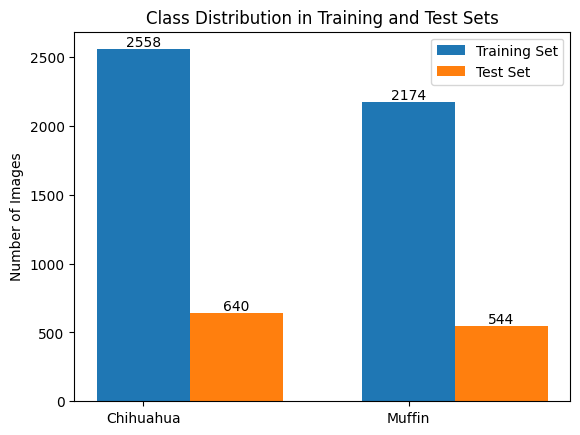

In [7]:
#the occurrences of each class in the training set
train_class_counts = [len([label for _, label in training_data if label == i]) for i in range(2)]

#  the occurrences of each class in the test set
test_class_counts = [len([label for _, label in test_data if label == i]) for i in range(2)]

# Plotting
labels = ['Chihuahua', 'Muffin']
bar_width = 0.35
fig, ax = plt.subplots()
train_bars = ax.bar(labels, train_class_counts, bar_width, label='Training Set')
test_bars = ax.bar([idx + bar_width for idx, label in enumerate(labels)], test_class_counts, bar_width, label='Test Set')

ax.set_ylabel('Number of Images')
ax.set_title('Class Distribution in Training and Test Sets')
ax.legend()

# to ad values on top of the bars
for bar, count in zip(train_bars, train_class_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom')

for bar, count in zip(test_bars, test_class_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom')


plt.savefig('plots/class_distribution_plot.png')

plt.show()



## Shuffling Data

common practice to introduce randomness into the dataset, which can improve the model's training.


In [8]:
random.shuffle(training_data)
random.shuffle(test_data)

In [9]:
for sample in training_data[3:6]:
  print(sample[1])                    #we got the labels shuffled so the data are shuffled
  print(sample[0]) #its a matrix for each image 

1
[[ 47  52  57 ... 217 145 142]
 [ 53  58  61 ... 222 218 232]
 [ 59  63  67 ... 203 227 233]
 ...
 [ 25  27  86 ... 229 231 233]
 [ 21  25  29 ... 228 232 233]
 [ 25  26  27 ... 209 238 237]]
1
[[ 57  46  33 ...   1   2   3]
 [ 31  20  16 ...   2   2   2]
 [ 18  14  14 ...   5   4   2]
 ...
 [244 243 243 ... 190 186 188]
 [248 244 242 ... 187 188 188]
 [226 247 244 ... 189 190 190]]
0
[[238 238 238 ... 238 238 238]
 [238 238 238 ... 238 238 238]
 [238 238 238 ... 238 238 238]
 ...
 [238 238 238 ... 238 238 238]
 [238 238 238 ... 238 238 238]
 [238 238 238 ... 238 238 238]]


## Data Splitting **X .. y**

X represents the features (in this case, preprocessed images), and y represents the corresponding labels (0 or 1, chihuahua or muffin).

In [10]:
X_train = []
y_train = []

X_test = []
y_test = []

In [11]:
for features, label in training_data:
  X_train.append(features)
  y_train.append(label)

for features, label in test_data:
  X_test.append(features)
  y_test.append(label)

In [12]:
print(X_train[:2],
y_train[:2])  # thats a muffin then a chihuahua

[array([[189, 194, 191, ...,  46,  72,  83],
       [161, 168, 163, ...,  55,  68,  70],
       [131, 146, 145, ...,  76,  48,  43],
       ...,
       [234, 235, 224, ..., 235, 243, 233],
       [228, 231, 207, ..., 241, 243, 196],
       [233, 229, 229, ..., 242, 243, 235]], dtype=uint8), array([[ 14,  21,  14, ...,  63,  68,  74],
       [ 15,  15,  12, ...,  68,  75,  77],
       [ 22,  16,  15, ...,  78,  81,  82],
       ...,
       [ 18,  24,  52, ...,  50,   5,  56],
       [ 18, 237,  99, ...,  13,  58,  63],
       [ 17,  37,  42, ...,  66,  61,  60]], dtype=uint8)] [1, 0]


`X_train`: A list that contains NumPy arrays, with each array representing a preprocessed image for training.

`y_train`: A list containing the corresponding training labels.

`X_test`: A list that contains NumPy arrays, with each array representing a preprocessed image for test.

`y_test`: A list containing the corresponding test labels.

## Conversion to NumPy Arrays
To work with machine learning libraries like TensorFlow, it's essential to convert these lists into NumPy arrays.

In [13]:
X_train = np.array(X_train)
X_train.shape

(4732, 64, 64)

In [14]:
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [15]:
y_train.shape

(4732,)

In [16]:
X_train[4]

array([[ 57,  46,  33, ...,   1,   2,   3],
       [ 31,  20,  16, ...,   2,   2,   2],
       [ 18,  14,  14, ...,   5,   4,   2],
       ...,
       [244, 243, 243, ..., 190, 186, 188],
       [248, 244, 242, ..., 187, 188, 188],
       [226, 247, 244, ..., 189, 190, 190]], dtype=uint8)

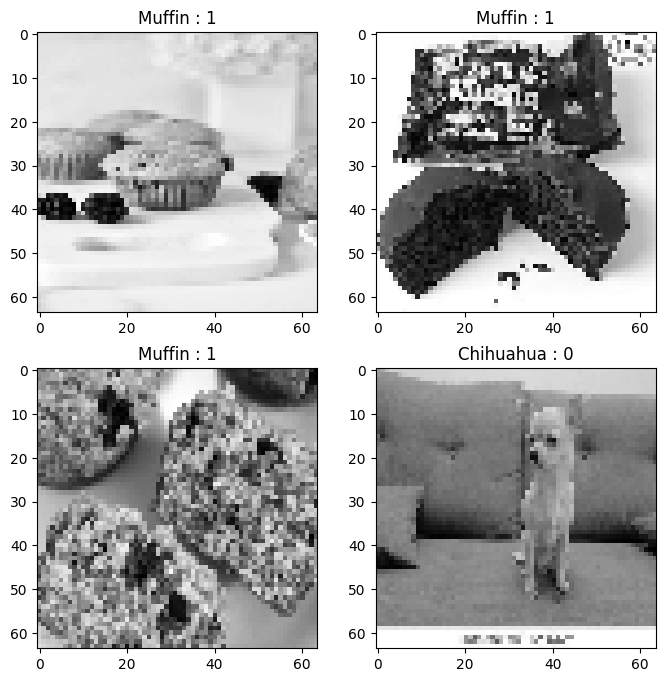

In [17]:
# random samples and labels from the training set
random_indices = random.sample(range(len(X_train)), 4)
random_samples = [X_train[i] for i in random_indices]
labels = [y_train[i] for i in random_indices]


fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for i in range(2):
    for j in range(2):
        # image and label at the selected index
        image = random_samples[i * 2 + j]
        label = labels[i * 2 + j]  # binary labels
        
        # Plot the image
        axes[i, j].imshow(image, cmap='gray')
        axes[i, j].axis('on')
        axes[i, j].set_title(f'Muffin : {label}' if label == 1 else f'Chihuahua : {label}')

plt.savefig('plots/random_sample_plot.png')


plt.show()


In [18]:
#  training data to NumPy arrays 
X_train = np.array(X_train)
y_train = np.array(y_train)


print("Shape of X_train before reshaping:", X_train.shape)




Shape of X_train before reshaping: (4732, 64, 64)


In [19]:
X_train[0]

array([[189, 194, 191, ...,  46,  72,  83],
       [161, 168, 163, ...,  55,  68,  70],
       [131, 146, 145, ...,  76,  48,  43],
       ...,
       [234, 235, 224, ..., 235, 243, 233],
       [228, 231, 207, ..., 241, 243, 196],
       [233, 229, 229, ..., 242, 243, 235]], dtype=uint8)

## Reshaping 
For CNNs, this shape often follows the format `(batch_size, height, width, channels)`

In [20]:
# reshaping training and test data 
X_train = X_train.reshape(-1, img_size, img_size, 1) #1 for gray 3 for RGB
X_test = X_test.reshape(-1, img_size, img_size, 1)





print("Shape of X_train after reshaping:", X_train.shape)


Shape of X_train after reshaping: (4732, 64, 64, 1)


In [21]:
X_train[0]

array([[[189],
        [194],
        [191],
        ...,
        [ 46],
        [ 72],
        [ 83]],

       [[161],
        [168],
        [163],
        ...,
        [ 55],
        [ 68],
        [ 70]],

       [[131],
        [146],
        [145],
        ...,
        [ 76],
        [ 48],
        [ 43]],

       ...,

       [[234],
        [235],
        [224],
        ...,
        [235],
        [243],
        [233]],

       [[228],
        [231],
        [207],
        ...,
        [241],
        [243],
        [196]],

       [[233],
        [229],
        [229],
        ...,
        [242],
        [243],
        [235]]], dtype=uint8)

In [22]:
print(X_train.shape) #its now 4732 photos each photo has a 64 X 64 matrix to show the pixels and 1 bcz its grayscale
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4732, 64, 64, 1)
(4732,)
(1184, 64, 64, 1)
(1184,)


## Normalization

In [23]:
#we need to normalise the values to go from 0 to 1
X_train = X_train/255.0
X_test = X_test/255.0

X_train.shape

(4732, 64, 64, 1)

In [24]:
X_train[0]

array([[[0.74117647],
        [0.76078431],
        [0.74901961],
        ...,
        [0.18039216],
        [0.28235294],
        [0.3254902 ]],

       [[0.63137255],
        [0.65882353],
        [0.63921569],
        ...,
        [0.21568627],
        [0.26666667],
        [0.2745098 ]],

       [[0.51372549],
        [0.57254902],
        [0.56862745],
        ...,
        [0.29803922],
        [0.18823529],
        [0.16862745]],

       ...,

       [[0.91764706],
        [0.92156863],
        [0.87843137],
        ...,
        [0.92156863],
        [0.95294118],
        [0.91372549]],

       [[0.89411765],
        [0.90588235],
        [0.81176471],
        ...,
        [0.94509804],
        [0.95294118],
        [0.76862745]],

       [[0.91372549],
        [0.89803922],
        [0.89803922],
        ...,
        [0.94901961],
        [0.95294118],
        [0.92156863]]])

## Saving them

In [53]:
folder_path = "chihuaha muffin data"  

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# data sets
sets = {"X_train": X_train,
        "X_test": X_test,
        "y_test": y_test,
        "y_train": y_train}

for sett, var in sets.items():
    pickle_path = os.path.join(folder_path, sett + ".pickle")
    with open(pickle_path, "wb") as pickle_out:
        pickle.dump(var, pickle_out)


# what I did:

- **Data Visualization**: Show sample images for data verification.

- **Data Preprocessing**: Resize, convert to grayscale, and load images.

- **Data Shuffling**: Introduce randomness for better model training.

- **Data Splitting**: Create separate arrays for features (X) and labels (y).

- **Data Conversion**: Convert lists to NumPy arrays for machine learning.

- **Data Reshaping**: Prepare data in the format suitable for CNNs.

- **Data Normalization**: Scale pixel values to a range of [0, 1].

- **Data Saving**: Save the preprocessed data for future use.

The overall goal is to prepare image data for machine learning, specifically for training a model to classify images as either 'chihuahua' or 'muffin.' These steps ensure the data is correctly formatted and ready for model training.